In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv('train.csv')

In [33]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### The goal of the analysis is to identify the most important features of houses that affect the sale prices, that is, the relationship between the sales price and other features ### 

In [34]:
# Examing the relationships between the sales price and other features 
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [35]:
# The following features of the house are highly correlated with the sales price
#GrLivArea 0.7
#OverallQual 0.79
#GarageCars 0.64
#Garage Areas 0.62
#TotalBsmtSF 0.6
#1stFlrSF 605852 0.6

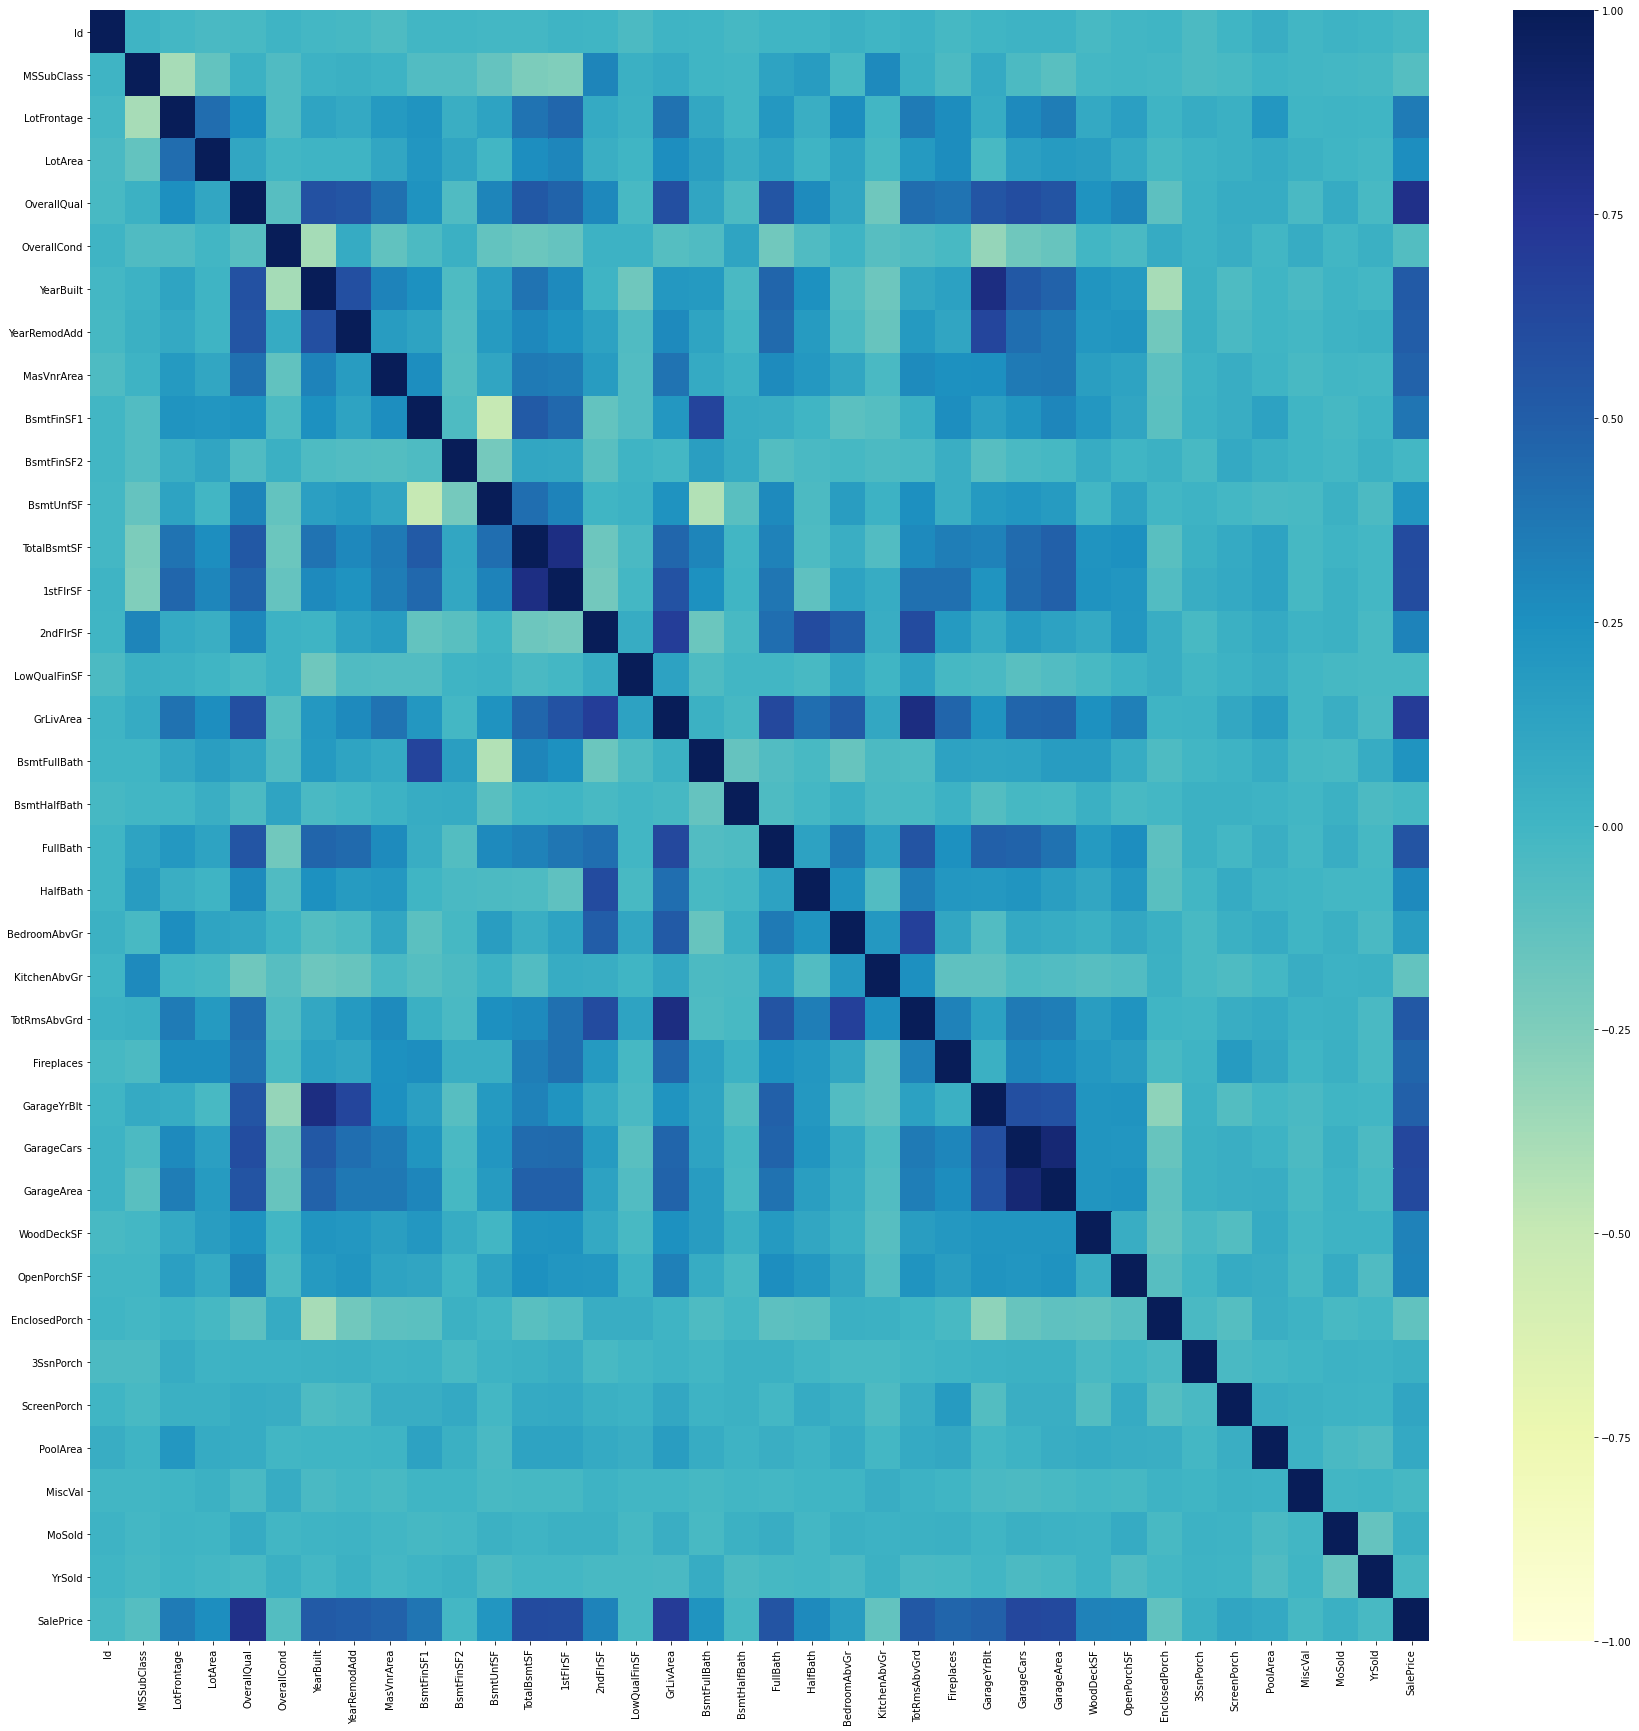

In [36]:
# Checking the correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), vmin= -1, vmax=1, cmap ='YlGnBu')
plt.show()

In [37]:
corr_table = pd.DataFrame(df.corrwith(df['SalePrice']), columns = ['correlation']).reset_index()

In [38]:
corr_table.head()

,index,correlation
0,Id,-0.021917
1,MSSubClass,-0.084284
2,LotFrontage,0.351799
3,LotArea,0.263843
4,OverallQual,0.790982


In [39]:
corr_table = corr_table[(corr_table['correlation'] >= 0.50) | (corr_table['correlation'] < -0.50)]
corr_table

,index,correlation
4,OverallQual,0.790982
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
12,TotalBsmtSF,0.613581
13,1stFlrSF,0.605852
16,GrLivArea,0.708624
19,FullBath,0.560664
23,TotRmsAbvGrd,0.533723
26,GarageCars,0.640409
27,GarageArea,0.623431


##### Nonnumerical variables that are not in the correlation table ###


In [40]:
# Neighborhood
# ExterCond
# Heating
# CentralAir (binary N/Y)
# SaleType

# Note that .corr() automatically takes out variables that are not correlated in the table

In [41]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### Inspecting the distribution of sales price  to ensure normal distribution ###

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

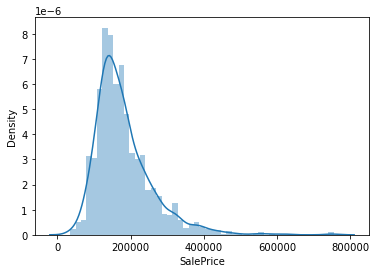

In [42]:
sns.distplot(df['SalePrice'])

# The output has lot of outliers making the distribution skewed to the right

### Adjusting the skewded distribution to a normal distribution ###


C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePriceAdjusted', ylabel='Density'>

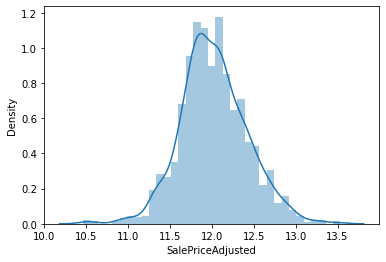

In [43]:
# To adjust the distribution graph since it is skewd to the right

df['SalePriceAdjusted'] = np.log(df['SalePrice'])
sns.distplot(df['SalePriceAdjusted'])

# The distribution is now skewed to the left...


### Data cleaning & manipulation
#### Remove columns with high proportion of missing values ###
##### Drop columns with 10% missing

In [45]:
percent_missing = df.isnull().sum() * 100 / len (df)
missing_values_df = pd.DataFrame({'column_name': df.columns,
                              'percent_missing': percent_missing})

checking_missing_values = missing_values_df[missing_values_df['percent_missing'] > 10]
checking_missing_values

,column_name,percent_missing
LotFrontage,LotFrontage,17.739726
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


In [46]:
#  Dropping these identified missing columns
# Instead of listing all the columns with missing values, we used a short-cut with 'checking_missing_values.index'

df.drop(list(checking_missing_values.index), axis=1, inplace=True)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceAdjusted
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,175000,12.072541
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2010,WD,Normal,210000,12.254863
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2500,5,2010,WD,Normal,266500,12.493130
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2010,WD,Normal,142125,11.864462


#### Subset the data sets to just columns we are interested in ###

In [47]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [56]:
# this include both numeric and categorical variables of interest

New_subset = df[['GrLivArea','OverallQual','GarageCars', 'YearRemodAdd','TotalBsmtSF','GarageType', 'GarageArea', '1stFlrSF', 'Neighborhood', 'ExterCond', 'Heating', 'CentralAir',
'SaleType', 'SalePrice', 'SalePriceAdjusted']]

In [57]:
New_subset


,GrLivArea,OverallQual,GarageCars,YearRemodAdd,TotalBsmtSF,GarageType,GarageArea,1stFlrSF,Neighborhood,ExterCond,Heating,CentralAir,SaleType,SalePrice,SalePriceAdjusted
0,1710,7,2,2003,856,Attchd,548,856,CollgCr,TA,GasA,Y,WD,208500,12.247694
1,1262,6,2,1976,1262,Attchd,460,1262,Veenker,TA,GasA,Y,WD,181500,12.109011
2,1786,7,2,2002,920,Attchd,608,920,CollgCr,TA,GasA,Y,WD,223500,12.317167
3,1717,7,3,1970,756,Detchd,642,961,Crawfor,TA,GasA,Y,WD,140000,11.849398
4,2198,8,3,2000,1145,Attchd,836,1145,NoRidge,TA,GasA,Y,WD,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,6,2,2000,953,Attchd,460,953,Gilbert,TA,GasA,Y,WD,175000,12.072541
1456,2073,6,2,1988,1542,Attchd,500,2073,NWAmes,TA,GasA,Y,WD,210000,12.254863
1457,2340,7,1,2006,1152,Attchd,252,1188,Crawfor,Gd,GasA,Y,WD,266500,12.493130
1458,1078,5,1,1996,1078,Attchd,240,1078,NAmes,TA,GasA,Y,WD,142125,11.864462


#### Converting Binary Data to Numerical ###

In [58]:
# CentralAir variable: binary Y/N to either 0 or 1

New_subset['CentralAir'] = np.where(New_subset['CentralAir']== 'Y', 1, 0)
#New_subset['CentralAir'].value_counts()

<ipython-input-58-322f3a5547c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_subset['CentralAir'] = np.where(New_subset['CentralAir']== 'Y', 1, 0)


In [59]:
New_subset['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

#### Converting Categorical Variables to Numerical ####

In [64]:
New_subset['Neighborhood'].value_counts().index

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert',
       'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW', 'BrkSide', 'Crawfor',
       'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'SWISU', 'StoneBr',
       'Blmngtn', 'MeadowV', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'],
      dtype='object')

In [67]:
# Sort Neighborhood by avg price

price = pd.pivot_table(New_subset, index = ['Neighborhood'], values = ['SalePrice'], aggfunc =[np.mean])
price

,mean
,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000


In [66]:
#X = pd.get_dummies(New_subset['Neighborhood'],drop_first=True)
#X


##### Compute field relationship scores with the chosen statistical model.
###### Presenting findings in statistical summary and data visualizations ###

In [68]:
import statsmodels.api as sm

Y = New_subset['SalePrice']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     772.7
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.72e-229
Time:                        14:45:21   Log-Likelihood:                -18016.
No. Observations:                1460   AIC:                         3.604e+04
Df Residuals:                    1457   BIC:                         3.605e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.829e+04   4157.728      6.805      0.000    2.01e+04    3.64e+04
GarageArea    158.1497      7.762     20.374      0.000     142.923     173.376
TotalBsmtSF    73.5999      3.783     19.456      0.000      66.179      81.021
==============================================================================
Omnibus:                      391.404   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10328.974
Skew:                           0.643   Prob(JB):                         0.00
Kurtosis:                      15.967   Cond. No.                     3.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
import statsmodels.api as sm

X = New_subset[['GarageArea', 'TotalBsmtSF']]
Y = New_subset['SalePriceAdjusted']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      SalePriceAdjusted   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     848.2
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          5.13e-245
Time:                        09:37:19   Log-Likelihood:                -167.71
No. Observations:                1460   AIC:                             341.4
Df Residuals:                    1457   BIC:                             357.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2427      0.020    551.135      0.000      11.203      11.283
GarageArea      0.0009   3.81e-05     22.690      0.000       0.001       0.001
TotalBsmtSF     0.0004   1.86e-05     18.987      0.000       0.000       0.000
==============================================================================
Omnibus:                      410.699   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3448.810
Skew:                          -1.066   Prob(JB):                         0.00
Kurtosis:                      10.221   Cond. No.                     3.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### Sales price adjusted gave us results in the resullts table

<Figure size 1440x720 with 0 Axes>

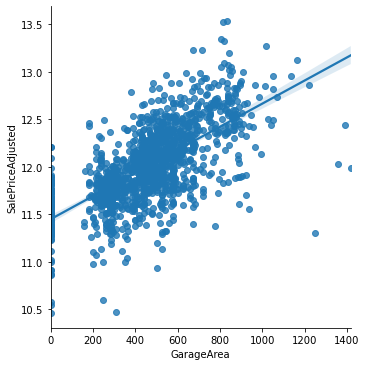

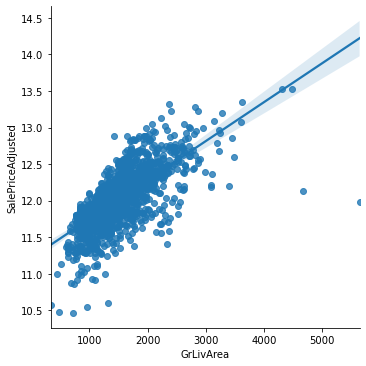

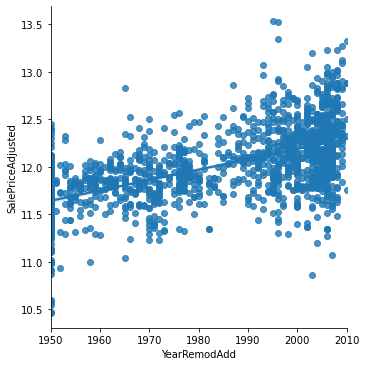

In [63]:
plt.figure(figsize=(20,10))
sns.color_palette('hls',8)
sns.lmplot(data = New_subset, x = 'GarageArea', y = 'SalePriceAdjusted', fit_reg = True)
sns.lmplot(data = New_subset, x = 'GrLivArea', y = 'SalePriceAdjusted')
sns.lmplot(data = New_subset, x = 'YearRemodAdd', y = 'SalePriceAdjusted', fit_reg = True )